In [1]:
import pandas as pd
import numpy as np

In [13]:
mnist = pd.read_csv('data/mnist.csv', header=None)
print(mnist.shape)
mnist.describe()

(500, 785)


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
count,500.000000,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,...,500.000000,500.000000,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0
mean,4.378000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.506000,0.256000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,2.873958,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.314504,5.724334,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,128.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
mnist.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
mnist.groupby(0).size()
# Checking the distribution of the labels

0
0    42
1    67
2    55
3    45
4    55
5    50
6    43
7    49
8    40
9    54
dtype: int64

<Figure size 640x480 with 0 Axes>

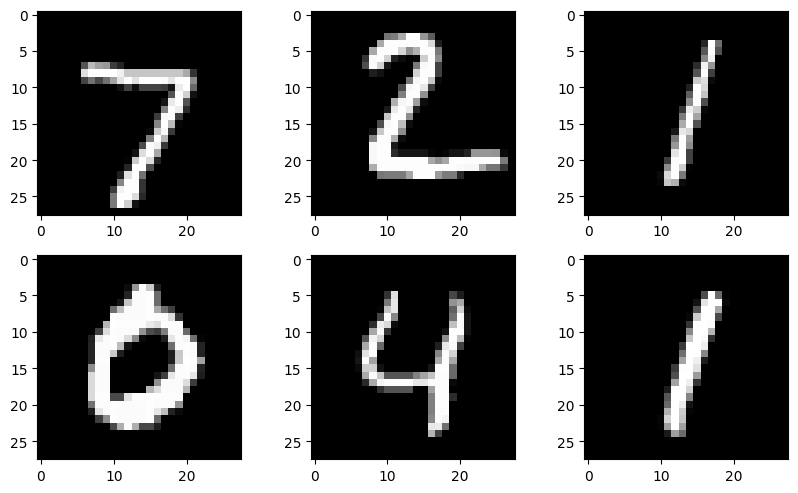

In [26]:
import matplotlib.pyplot as plt

plt.gray()
plt.figure(figsize=(10, 9))
for i in range(6):
    plt.subplot(3, 3, i + 1)
    plt.imshow(mnist.iloc[i, 1:].values.reshape((28, 28)))

In [11]:
two_dim_dataset = pd.read_csv('data/data_2d.csv', header=None)
two_dim_dataset.describe()

,0,1,2
count,200.000000,200.000000,200.000000
mean,0.500000,1.758886,2.211502
std,0.501255,1.239986,1.605176
min,0.000000,-1.488928,-1.344141
25%,0.000000,0.874456,0.955211
50%,0.500000,1.729753,2.282891
75%,1.000000,2.701499,3.602253
max,1.000000,4.554605,5.722027


In [12]:
two_dim_dataset.head()

,0,1,2
0,0.0,-0.768716,0.460860
1,0.0,2.687848,2.366961
2,0.0,-0.201379,0.470430
3,0.0,0.608496,1.225400
4,0.0,-0.082282,1.137218


In [54]:
from sklearn.cluster import KMeans

X = mnist.iloc[:, 1:]
y = mnist.iloc[:, 0]

K_range = range(1, 14)
inertias = []
for k in K_range:
    kmean = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmean.fit(X)
    inertias.append(kmean.inertia_)

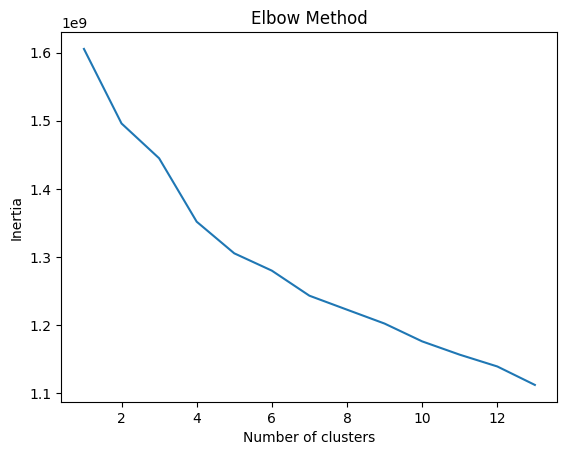

In [55]:
plt.plot(range(1, 14), inertias)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia') 
plt.show()

In [56]:
kmeans = KMeans(n_clusters=5, n_init='auto', random_state=42)
X_kmeans = kmeans.fit(X)

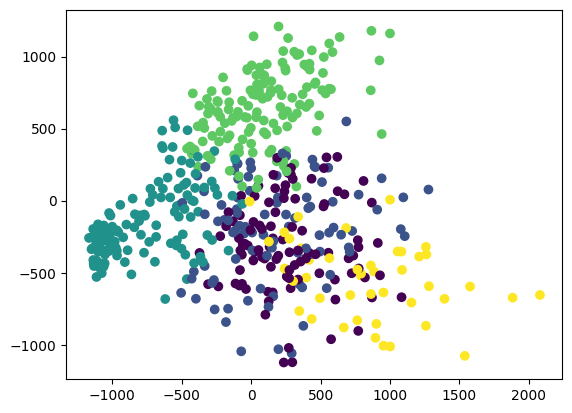

In [57]:
from sklearn.decomposition import PCA
X_transformed = PCA(n_components=2).fit_transform(X)
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=X_kmeans.labels_, cmap='viridis')

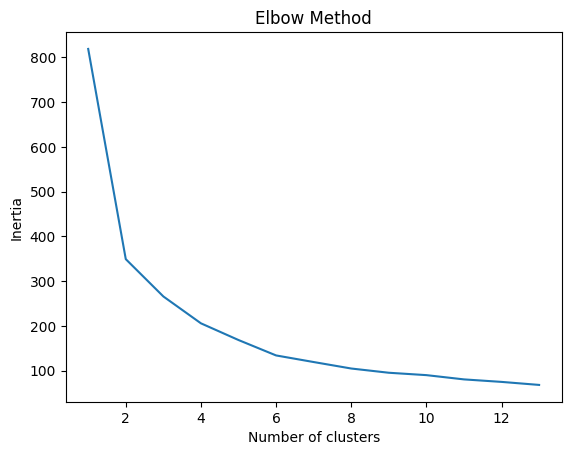

In [61]:
from sklearn.cluster import KMeans

X = two_dim_dataset.iloc[:, 1:]
y = two_dim_dataset.iloc[:, 0]

K_range = range(1, 14)
inertias = []
for k in K_range:
    kmean = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmean.fit(X)
    inertias.append(kmean.inertia_)
    
plt.plot(range(1, 14), inertias)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia') 
plt.show()

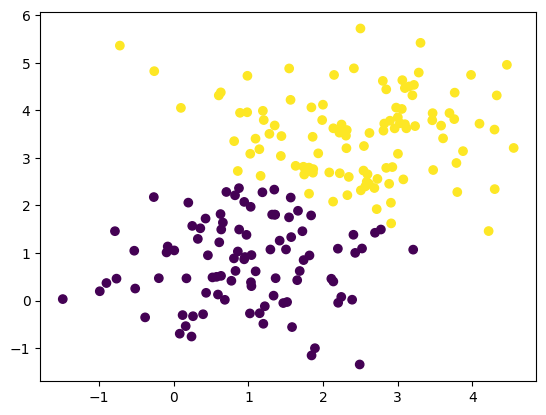

In [78]:
kmeans = KMeans(n_clusters=2, n_init='auto', random_state=42)
X_kmeans = kmeans.fit(X)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=X_kmeans.labels_, cmap='viridis')

In [19]:
from PIL import Image
import numpy as np

data = mnist.iloc[0, 1:]
pixel_data = np.array(data).reshape((28, 28))

# Convert pixel values to 8-bit grayscale image
image = Image.fromarray(pixel_data.astype(np.uint8), mode='L')
image.save('output_image.jpg')
pixel_data

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  